Program to Implement a model to demonstrate howDropout Layer reduces overfitting in Neural Network

Inititally without Dropouts

In [ ]:
# generate two circles dataset
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

In [ ]:
from sklearn import datasets

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

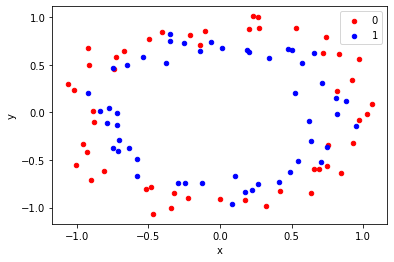

In [ ]:
#The Visualization of unclassified binary circles
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Building a Model without **Dropouts** 

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [ ]:
from keras import models
from keras import layers

# define model
model = models.Sequential()
model.add(layers.Dense(500, input_dim=2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.786


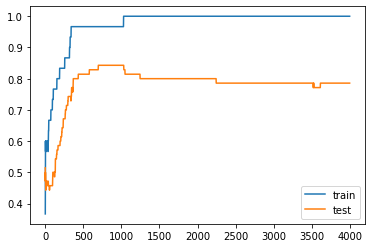

In [ ]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Building a Model using Dropouts **Layer**

In [ ]:
# mlp with dropout on the two circles dataset
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from matplotlib import pyplot

In [ ]:
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [ ]:
trainX

array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147],
       [-0.49776571,  0.76955129],
       [-0.31914906, -0.84899624],
       [-0.57839322, -0.49081236],
       [-0.53350227,  0.58056527],
       [-0.24733259,  0.73011595],
       [ 0.41030774, -0.73075986],
       [ 0.17181003, -0.92504802],
       [ 0.65917045,  0.62120588],
       [ 0.87625577,  0.12510879],
       [ 0.81946243, -0.01347859],
       [-0.47960986, -0.7880243 ],
       [-0.90187751, -0.70895455],
       [ 0.74827659, -0.55976747],
       [-0.74875324, -0.37153443],
       [ 0.23161178,  1.01205842],
       [ 0.81387506,  0.22821311],
       [-0.92169575,  0.20310719],
       [ 0.74650434, -0.35861224],
       [ 0.01330079,  0.68169193],
       [-0.72651409,  0.58630948],
       [-0.33930852, -1.0080984 ],
       [ 0.49009938, -0.62509577],
       [-0.9539309 , -0.33410313],
       [ 0.6927241 ,

In [ ]:
testX

array([[-0.35077763,  0.82536558],
       [ 0.94798269, -0.14503976],
       [ 0.52327611,  0.20621942],
       [ 0.54670705, -0.51026584],
       [ 0.10385825, -0.66844291],
       [ 0.31843503, -0.97937344],
       [ 0.92901189, -0.31993308],
       [ 0.20498887,  0.64009007],
       [-1.01797423,  0.23454524],
       [-0.51324637, -0.80013947],
       [-0.12292134, -0.74493827],
       [ 0.71008749,  0.30557432],
       [-0.71742651, -0.13028889],
       [-0.13663998,  0.7088594 ],
       [-0.57877973, -0.67082245],
       [ 0.41812614, -0.82061786],
       [ 0.84575703, -0.63891465],
       [ 0.26707772, -0.74994685],
       [-0.87474347, -0.09886802],
       [ 0.62430557, -0.0931694 ],
       [ 0.65495356, -0.59471995],
       [ 0.57445296,  0.52172511],
       [-1.0617065 ,  0.30319732],
       [ 0.96779554,  0.56332827],
       [ 0.49980305,  0.65833135],
       [ 0.9717675 , -0.08311653],
       [-0.74061828,  0.46063137],
       [ 0.08203902, -0.95784326],
       [ 0.9202249 ,

In [ ]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 53ms/step - loss: 0.1328 - accuracy: 0.9667 - val_loss: 0.5859 - val_accuracy: 0.8143
Epoch 1502/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.1041 - accuracy: 0.9667 - val_loss: 0.5867 - val_accuracy: 0.8143
Epoch 1503/4000
1/1 [==============================] - 0s 56ms/step - loss: 0.1290 - accuracy: 0.9667 - val_loss: 0.5867 - val_accuracy: 0.8143
Epoch 1504/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.1082 - accuracy: 0.9667 - val_loss: 0.5869 - val_accuracy: 0.8143
Epoch 1505/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.0907 - accuracy: 0.9667 - val_loss: 0.5876 - val_accuracy: 0.8143
Epoch 1506/4000
1/1 [==============================] - 0s 53ms/step - loss: 0.1954 - accuracy: 0.9333 - val_loss: 0.5878 - val_accuracy: 0.8143
Epoch 1507/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.1295 - accuracy: 0.9667

In [24]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.843


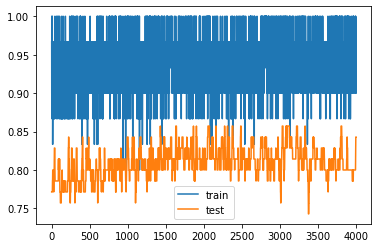

In [23]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()